In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import find_peaks
import datetime
from zoneinfo import ZoneInfo
import naa

In [2]:
run_dir = '241212_BABY_1L_run2'
directories = {}
directories['Na22_1']  = f'{run_dir}/DAQ/Na22_7_33uCi_2May2016_20241213_4in/UNFILTERED'
directories['Cs137_1'] = f'{run_dir}/DAQ/Cs137_4_66uCi_19Mar2014_20241213_4in/UNFILTERED'
directories['Co60_1']  = f'{run_dir}/DAQ/Co60_0_872uCi_19Mar2014_20241213_4in/UNFILTERED'
directories['Mn54']  = f'{run_dir}/DAQ/Mn54_6_27uCi_2May2016_20241213_4in/UNFILTERED'

directories['Zirconium'] = f'{run_dir}/DAQ/Zirconium_20241213_2155_4in/UNFILTERED'
directories['Niobium'] = f'{run_dir}/DAQ/Niobium4_20241214_1329_4in/UNFILTERED'
directories['Background'] = f'{run_dir}/DAQ/Background_20241215_1800_4in/UNFILTERED'

In [3]:
# decay_lines = {'Ba133':{'energy':[80.9979, 276.3989, 302.8508, 356.0129, 383.8485],
#                          'intensity':[0.329, 0.0716, 0.1834, 0.6205, 0.0894],
#                          'half_life':[10.551*365.25*24*3600]},
#                 'Co60':{'energy':[1173.228, 1332.492],
#                         'intensity':[0.9985, 0.999826],
#                         'half_life':[1925.28*24*3600]},
#                 'Na22':{'energy':[511, 1274.537],
#                         'intensity':[1.80, 0.9994],
#                         'half_life':[2.6018*365.25*24*3600]},
#                 'Cs137':{'energy':[661.657],
#                          'intensity':[0.851],
#                          'half_life':[30.08*365.25*24*3600]},
#                 'Mn54':{'energy':[834.848],
#                         'intensity':[0.99976],
#                         'half_life':[312.20*24*3600]}}
decay_lines = {
                # 'Ba133':{'energy':[356.0129],
                #          'intensity':[0.6205],
                #          'half_life':[10.551*365.25*24*3600],
                #          'activity_date':datetime.datetime(2014, 3, 19, 12, 0, 0, 0, ZoneInfo('America/New_York')),
                #          'activity':1 * 3.7e4},
                'Co60_1':{'energy':[1173.228, 1332.492],
                        'intensity':[0.9985, 0.999826],
                        'half_life':[1925.28*24*3600],
                        'activity_date':datetime.datetime(2014, 3, 19, 12, 0, 0, 0, ZoneInfo('America/New_York')),
                        'activity':0.872 * 3.7e4},
                # 'Zirconium':{'energy':[909.15], 
                #              'intensity':[0.9904],
                #              'half_life':[78.41 * 3600]},
                # 'Co60_2':{'energy':[1173.228, 1332.492],
                #         'intensity':[0.9985, 0.999826],
                #         'half_life':[1925.28*24*3600],
                #         'activity_date':datetime.datetime(2006, 2, 15, 12, 0, 0, 0, ZoneInfo('America/New_York')),
                #         'activity':1.0 * 3.7e4},
                # 'Co60_3':{'energy':[1173.228, 1332.492],
                #         'intensity':[0.9985, 0.999826],
                #         'half_life':[1925.28*24*3600],
                #         'activity_date':datetime.datetime(2006, 1, 15, 12, 0, 0, 0, ZoneInfo('America/New_York')),
                #         'activity':1.0 * 3.7e4},
                # 'Na22_1':{'energy':[511, 1274.537],
                #         'intensity':[1.80, 0.899],
                #         'half_life':[2.6018*365.25*24*3600],
                #         'activity_date':datetime.datetime(2014, 3, 19, 12, 0, 0, 0, ZoneInfo('America/New_York')),
                #         'activity': 5 * 3.7e4},
                'Na22_1':{'energy':[511, 1274.537],
                        'intensity':[1.80, 0.899],
                        'half_life':[2.6018*365.25*24*3600],
                        'activity_date':datetime.datetime(2016, 5, 2, 12, 0, 0, 0, ZoneInfo('America/New_York')),
                        'activity': 7.33 * 3.7e4},
                # 'Na22_3':{'energy':[511, 1274.537],
                #         'intensity':[1.80, 0.899],
                #         'half_life':[2.6018*365.25*24*3600],
                #         'activity_date':datetime.datetime(2023, 9, 29, 12, 0, 0, 0, ZoneInfo('America/New_York')),
                #         'activity': 9.98 * 3.7e4},
                'Cs137_1':{'energy':[661.657],
                         'intensity':[0.851],
                         'half_life':[30.08*365.25*24*3600],
                         'activity_date':datetime.datetime(2014, 3, 19, 12, 0, 0, 0, ZoneInfo('America/New_York')),
                         'activity':4.66 * 3.7e4},
                # 'Cs137_2':{'energy':[661.657],
                #          'intensity':[0.851],
                #          'half_life':[30.08*365.25*24*3600],
                #          'activity_date':datetime.datetime(2006, 1, 15, 12, 0, 0, 0, ZoneInfo('America/New_York')),
                #          'activity':5.0 * 3.7e4},
                # 'Cs137_3':{'energy':[661.657],
                #          'intensity':[0.851],
                #          'half_life':[30.08*365.25*24*3600],
                #          'activity_date':datetime.datetime(2023, 9, 29, 12, 0, 0, 0, ZoneInfo('America/New_York')),
                #          'activity':9.38 * 3.7e4},
                'Mn54':{'energy':[834.848],
                        'intensity':[0.99976],
                        'half_life':[312.20*24*3600],
                        'activity_date':datetime.datetime(2016, 5, 2, 12, 0, 0, 0, ZoneInfo('America/New_York')),
                        'activity':6.27 * 3.7e4}}

In [4]:
import os
os.listdir(run_dir + '/DAQ/')

['Co60_0_872uCi_19Mar2014_241213',
 'Niobium4_20241214_1329_4in',
 '.DS_Store',
 'cs137_test',
 'Na22_7_33uCi_2May2016_241213',
 'Co60_0_872uCi_19Mar2014_20241213_4in',
 'Zirconium_20241212_1644',
 'Na22_7_33uCi_2May2016_20241213_4in',
 'Cs137_4_66uCi_19Mar2014_20241213_4in',
 'Mn54_6_27uCi_2May2016_241213',
 'Zirconium_20241213_2155_4in',
 'Background_20241215_1800_4in',
 'Mn54_6_27uCi_2May2016_20241213_4in',
 'Cs137_4_66uCi_19Mar2014_241213']

In [5]:
counts = naa.get_compass_counts(directories, savefile=f'{run_dir}/counts.pkl')

In [6]:
counts = naa.subtract_background(counts, directories['Background'], savefile=f'{run_dir}/counts_bkg_sub.pkl')

In [7]:
default_peak_inputs = {'Na22':{'height_factor':0.30, 'prom_factor':0.30, 'width':[10, 200], 'start_index':300},
               'Cs137':{'height_factor':0.01,'prom_factor':0.075, 'width':[10, 150], 'start_index':100},
               'Co60':{'height_factor':0.6,'prom_factor':0.2, 'width':[20, 200], 'start_index':400},
               'Mn54':{'height_factor':0.01,'prom_factor':0.075, 'width':[10, 150], 'start_index':100},
               'Ba133':{'height_factor':0.01,'prom_factor':0.1, 'width':[10, 200], 'start_index':100},
               'Zirconium':{'height_factor':0.01,'prom_factor':0.075, 'width':[10, 100], 'start_index':100},
               'Niobium':{'height_factor':0.01,'prom_factor':0.075, 'width':[10, 150], 'start_index':100},
               'Background':{'height_factor':0.01,'prom_factor':0.075, 'width':[10, 150], 'start_index':100}}
peak_inputs = {}
peak_input_keys = default_peak_inputs.keys()
for sample in counts.keys():
    for pikey in peak_input_keys:
        if pikey in sample:
            peak_inputs[sample] = default_peak_inputs[pikey]
print(peak_inputs)

    


{'Na22_1': {'height_factor': 0.3, 'prom_factor': 0.3, 'width': [10, 200], 'start_index': 300}, 'Cs137_1': {'height_factor': 0.01, 'prom_factor': 0.075, 'width': [10, 150], 'start_index': 100}, 'Co60_1': {'height_factor': 0.6, 'prom_factor': 0.2, 'width': [20, 200], 'start_index': 400}, 'Mn54': {'height_factor': 0.01, 'prom_factor': 0.075, 'width': [10, 150], 'start_index': 100}, 'Zirconium': {'height_factor': 0.01, 'prom_factor': 0.075, 'width': [10, 100], 'start_index': 100}, 'Niobium': {'height_factor': 0.01, 'prom_factor': 0.075, 'width': [10, 150], 'start_index': 100}, 'Background': {'height_factor': 0.01, 'prom_factor': 0.075, 'width': [10, 150], 'start_index': 100}}


543
643
Na22: searched prominence: 1362.0  : [1318] {'peak_heights': array([2724.]), 'prominences': array([2655.]), 'left_bases': array([556]), 'right_bases': array([1426]), 'widths': array([78.24506803]), 'width_heights': array([1396.5]), 'left_ips': array([636.425]), 'right_ips': array([714.67006803])}
Na22_1 [np.int64(543), np.int64(1318)]
Na22_1 5 [np.int64(543), np.int64(1318)]
678
778
Na22: searched prominence: 903.0  : [1629] {'peak_heights': array([1806.]), 'prominences': array([1740.]), 'left_bases': array([658]), 'right_bases': array([1825]), 'widths': array([105.6104952]), 'width_heights': array([936.]), 'left_ips': array([800.26829268]), 'right_ips': array([905.87878788])}
Na22_1 [np.int64(678), np.int64(1629)]
Na22_1 4 [np.int64(678), np.int64(1629)]
Cs137_1 [870]
Cs137_1 4 [870]
Cs137_1 [698]
Cs137_1 5 [698]
Co60_1 [1501 1686]
Co60_1 4 [1501 1686]
Co60_1 [1209 1370]
Co60_1 5 [1209 1370]
Mn54 [1086]
Mn54 4 [1086]
Mn54 [869]
Mn54 5 [869]
Zirconium [541 943]
Zirconium 5 [541

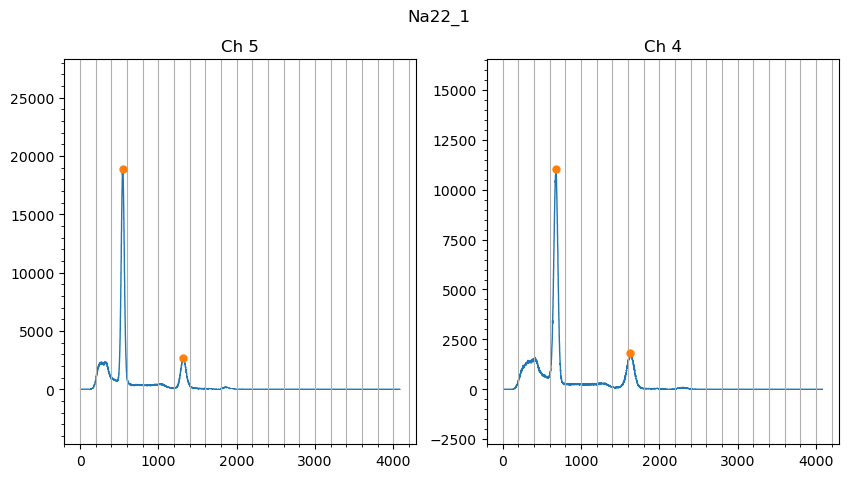

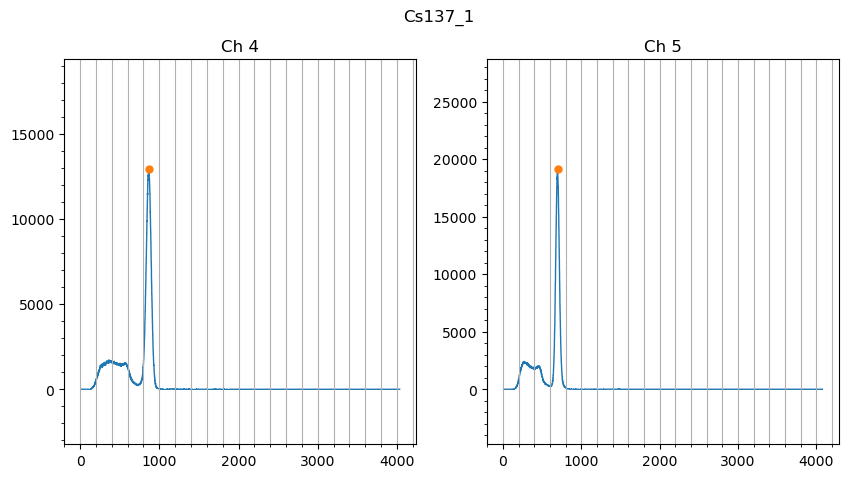

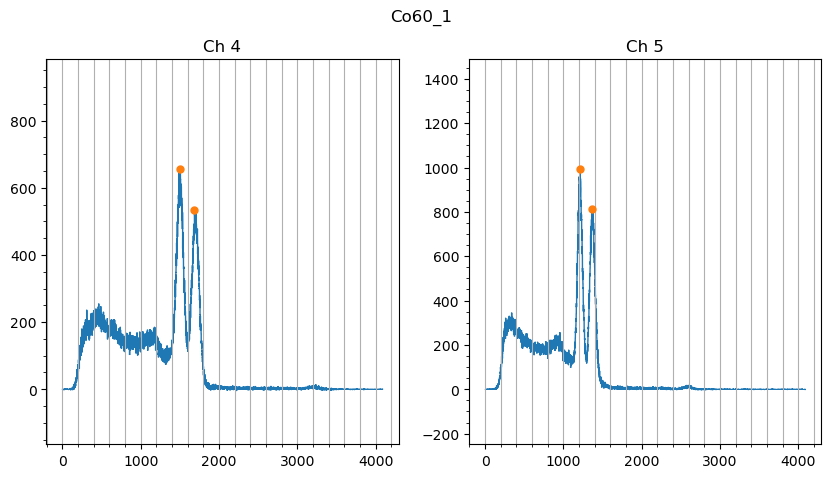

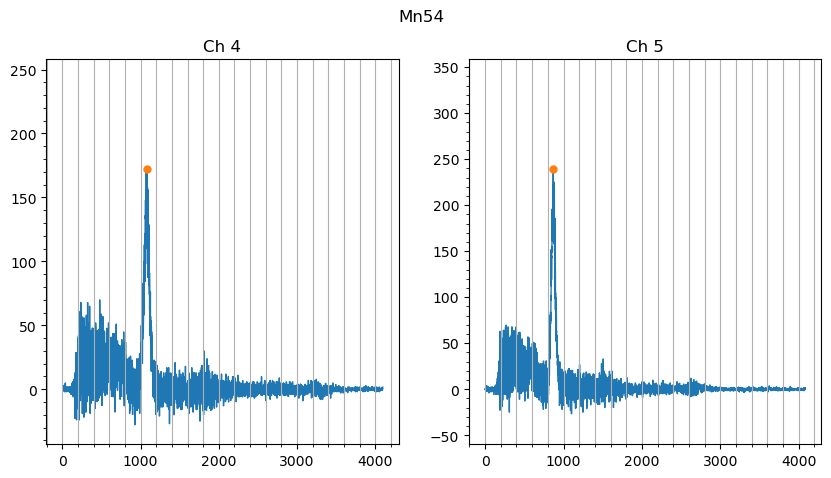

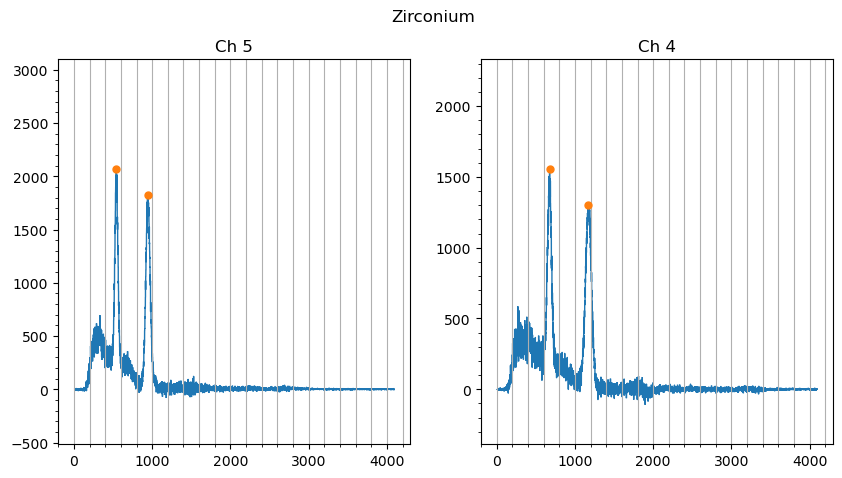

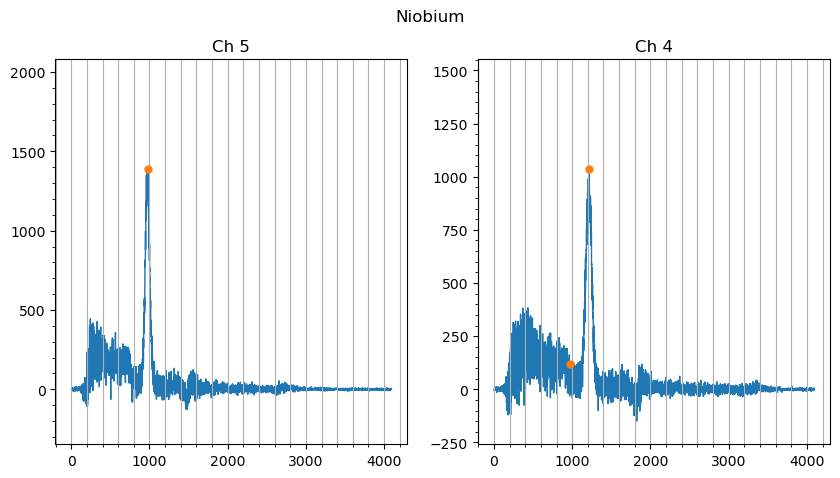

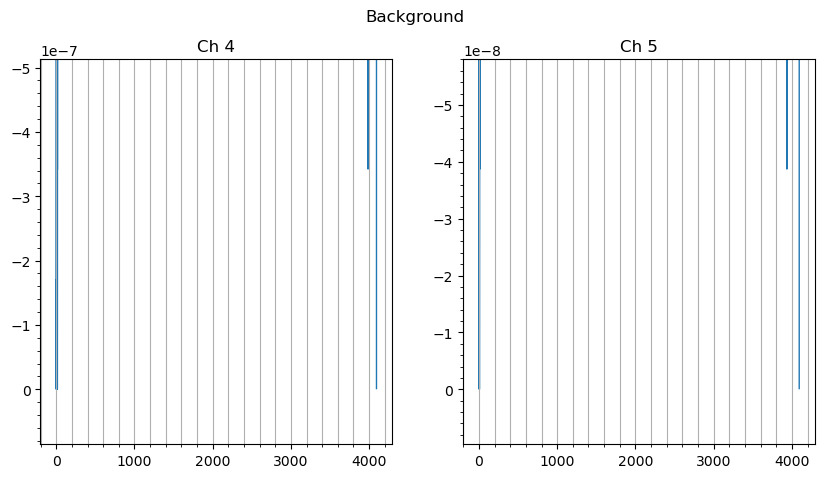

In [8]:

for sample in counts.keys():
    fig, ax = plt.subplots(nrows=1, ncols=len(counts[sample].keys()), figsize=[10, 5])
    for i,ch in enumerate(counts[sample].keys()):
        # peaks, peak_data = find_peaks(counts[sample][ch]['hist'][peak_inputs[sample]['start_index']:],
        #                               height=peak_inputs[sample]['height_factor']*np.max(counts[sample][ch]['hist'][peak_inputs[sample]['start_index']:]),
        #                               prominence=peak_inputs[sample]['prom_factor']*np.max(counts[sample][ch]['hist'][peak_inputs[sample]['start_index']:]),
        #                               width=peak_inputs[sample]['width'])
        ax[i].stairs(counts[sample][ch]['hist'], counts[sample][ch]['bin_edges'])
        peaks = naa.get_peaks(counts[sample][ch]['hist'], sample)
        print(sample, ch, peaks)
        ax[i].plot(peaks, counts[sample][ch]['hist'][peaks], '.', ms=10)
        ax[i].set_title('Ch {}'.format(ch))
        # ax[i].set_yscale('log')
        ax[i].minorticks_on()
        ax[i].xaxis.grid(which='both')
        y_max = np.max(counts[sample][ch]['hist'][peak_inputs[sample]['start_index']:])
        ax[i].set_ylim(-y_max*0.25, y_max*1.5)
        if sample=='Co60_3' and ch==2:
            ax[i].set_xlim(1500, 2100)
    fig.suptitle(sample)

{'Na22_1': {'height_factor': 0.3, 'prom_factor': 0.3, 'width': [10, 200], 'start_index': 300}, 'Cs137_1': {'height_factor': 0.01, 'prom_factor': 0.075, 'width': [10, 150], 'start_index': 100}, 'Co60_1': {'height_factor': 0.6, 'prom_factor': 0.2, 'width': [20, 200], 'start_index': 400}, 'Mn54': {'height_factor': 0.01, 'prom_factor': 0.075, 'width': [10, 150], 'start_index': 100}, 'Zirconium': {'height_factor': 0.01, 'prom_factor': 0.075, 'width': [10, 100], 'start_index': 100}, 'Niobium': {'height_factor': 0.01, 'prom_factor': 0.075, 'width': [10, 150], 'start_index': 100}, 'Background': {'height_factor': 0.01, 'prom_factor': 0.075, 'width': [10, 150], 'start_index': 100}}
Co60_1 [1209 1370]
5 Co60_1 [1209 1370]
543
643
Na22: searched prominence: 1362.0  : [1318] {'peak_heights': array([2724.]), 'prominences': array([2655.]), 'left_bases': array([556]), 'right_bases': array([1426]), 'widths': array([78.24506803]), 'width_heights': array([1396.5]), 'left_ips': array([636.425]), 'right_ip

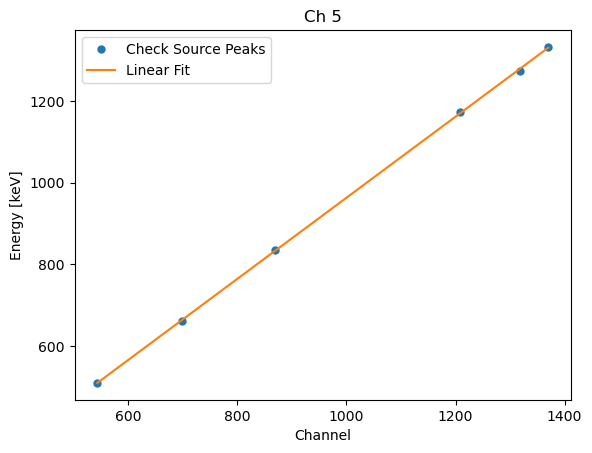

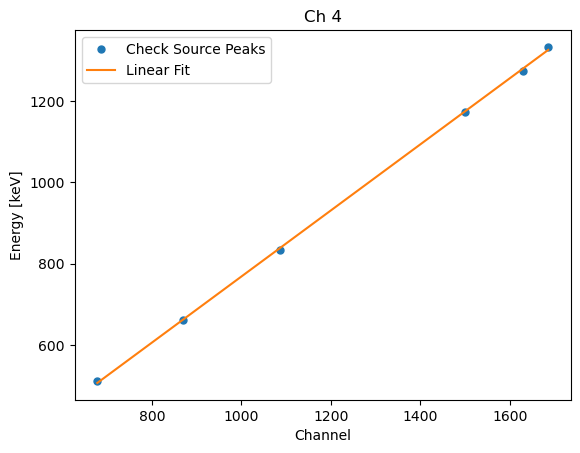

In [9]:
counts, coeff = naa.calibrate_counts(counts, peak_inputs=peak_inputs, decay_lines=decay_lines, plot_calibration=True)

In [10]:
# decay_lines['Ba133']['energy'] = [276.3989, 302.8508, 356.0129, 383.8485]
# decay_lines['Ba133']['intensity'] = [0.0716, 0.1834, 0.6205, 0.0894]


# for source in decay_lines.keys():
#     for ch in counts[source].keys():
#         print(source, ch, decay_lines[source]['energy'])
#         naa.get_peak_areas(counts[source][ch]['hist'],
#                             counts[source][ch]['calibrated_bin_edges'],
#                             decay_lines[source]['energy'],
#                             overlap_width=200,
#                             search_width=500,
#                             plot=True)
#         if source=='Zirconium':
#             plt.title('Zirconium Foil Gamma Spectrum')
#             plt.xlim(0, 1500)

Cs137_1  Ch  4
[(661.657,)]
Plot gauss params: [np.float64(1822.2878855741906), np.float64(-2.243716684812353), np.float64(12546.045473770868), np.float64(659.9942181161665), np.float64(24.25571997704719)]
[np.float64(760574.3283658929)]
Peak areas:  [np.float64(760574.3283658929)]
Activity measured:  [2456.39428674]
decay constant:  [7.30203083e-10]
count time:  338893437.455
Activity expected:  [134622.19883173]
efficiency:  [0.01824658]
Cs137_1  Ch  5
[(661.657,)]
Plot gauss params: [np.float64(2321.9715199063244), np.float64(-2.812503263281916), np.float64(18444.66790172539), np.float64(663.6478782448753), np.float64(22.17241973350475)]
[np.float64(1022093.561456522)]
Peak areas:  [np.float64(1022093.561456522)]
Activity measured:  [3301.79216747]
decay constant:  [7.30203083e-10]
count time:  338893437.455
Activity expected:  [134622.19883173]
efficiency:  [0.02452636]
Co60_1  Ch  4
[(1173.228, 1332.492)]
Plot gauss params: [np.float64(317.17929989139554), np.float64(-0.2060480527

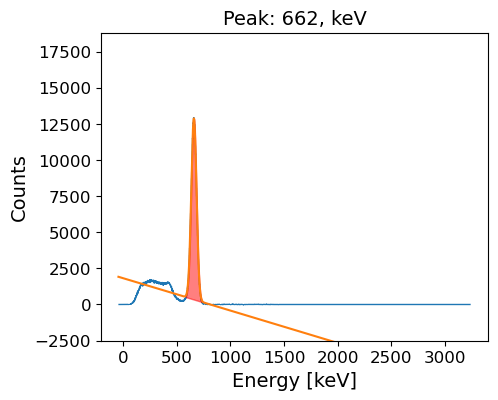

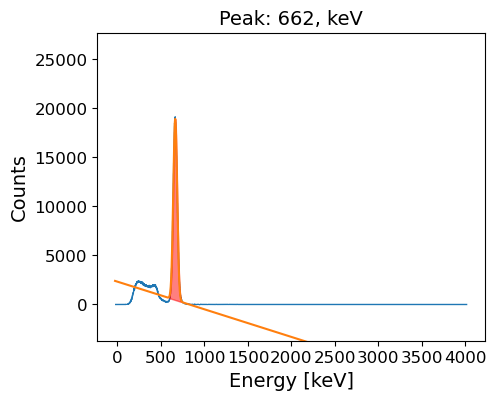

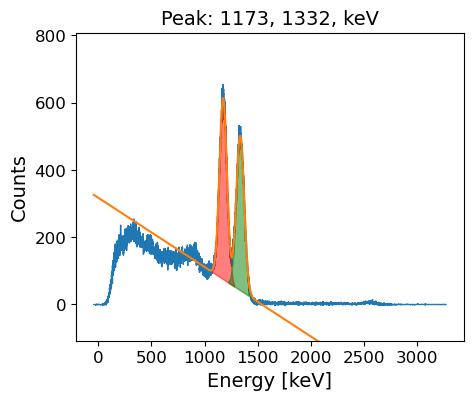

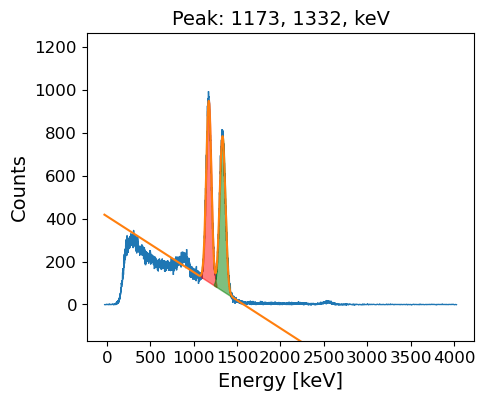

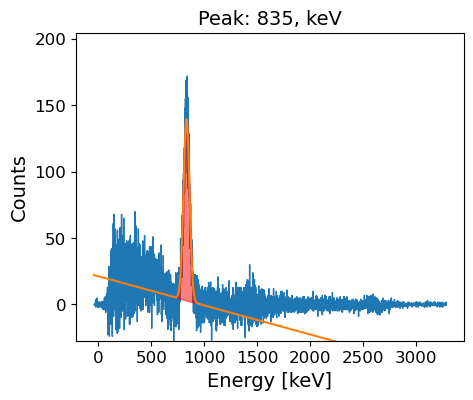

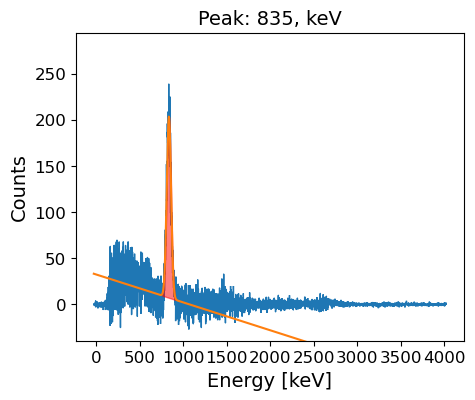

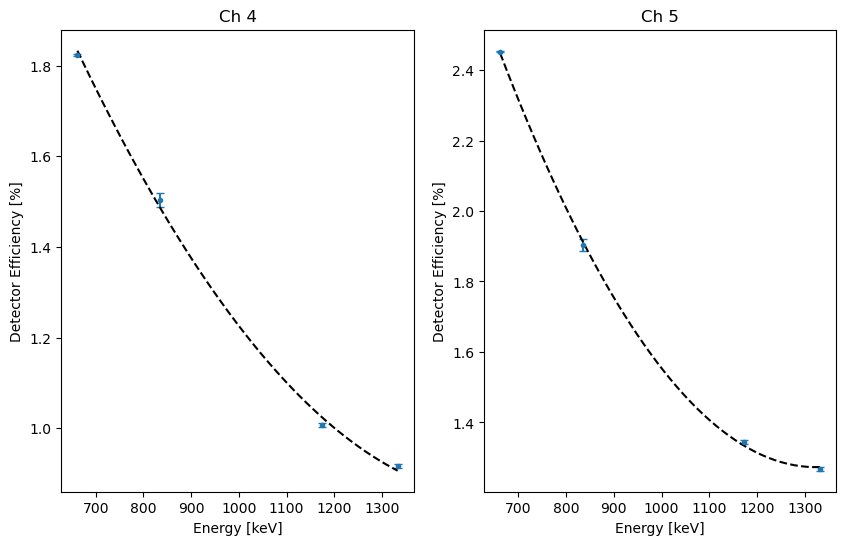

In [11]:
nuclides = [ 'Cs137_1',
             'Co60_1', 
            'Mn54', 
            # 'Na22_1'
            ]
effs, eff_errs, eff_coeff = naa.energy_efficiency(counts, decay_lines, nuclides=nuclides,
                      plot_eff=True, plot_areas=True,
                      overlap_width=200, search_width=500,
                      degree=2)

Cs137_1  Ch  4
[(661.657,)]
[np.float64(783313.3443062596)]
Peak areas:  [np.float64(783313.3443062596)]
Activity measured:  [2529.83351123]
decay constant:  [7.30203083e-10]
count time:  338893437.455
Activity expected:  [134622.19883173]
efficiency:  [0.0187921]
Cs137_1  Ch  5
[(661.657,)]
[np.float64(1046707.7457588431)]
Peak areas:  [np.float64(1046707.7457588431)]
Activity measured:  [3381.30633721]
decay constant:  [7.30203083e-10]
count time:  338893437.455
Activity expected:  [134622.19883173]
efficiency:  [0.025117]
Co60_1  Ch  4
[(1173.228, 1332.492)]
[np.float64(46934.7333817392), np.float64(43561.14405204196)]
Peak areas:  [np.float64(46934.7333817392), np.float64(43561.14405204196)]
Activity measured:  [79.47189417 73.66176646]
decay constant:  [4.16694549e-09]
count time:  338894078.934
Activity expected:  [7860.09665891]
efficiency:  [0.0101108  0.00937161]
Co60_1  Ch  5
[(1173.228, 1332.492)]
[np.float64(63054.16485291003), np.float64(59167.439312981674)]
Peak areas:  [

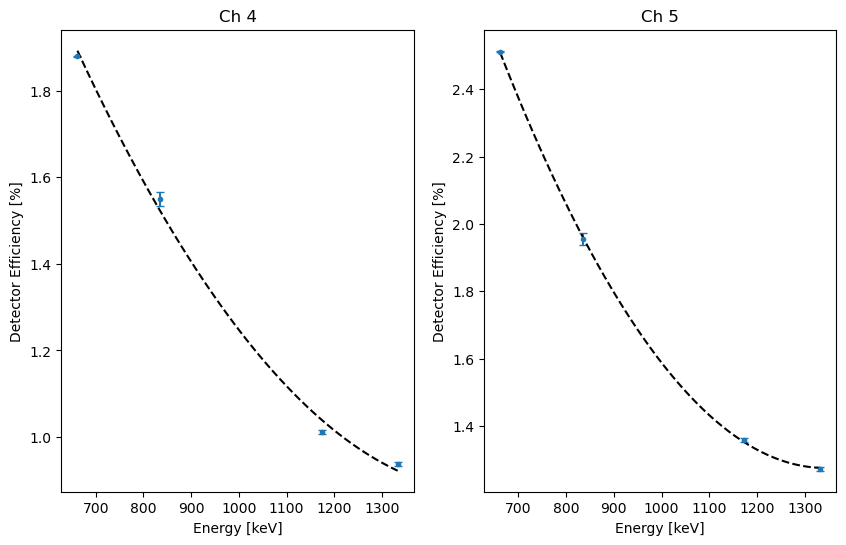

In [12]:
nuclides = [ 'Cs137_1',
             'Co60_1', 
            'Mn54']
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[10,6])
effs, eff_errs, eff_coeff = naa.energy_efficiency(counts, decay_lines, nuclides=nuclides,
                      plot_eff=True, plot_areas=False,
                      overlap_width=200, search_width=300,
                      degree=2, count_sum_peak=False, ax_eff=ax)
# effs, eff_errs, eff_coeff = naa.energy_efficiency(counts, decay_lines, nuclides=nuclides,
#                       plot_eff=True, plot_areas=True,
#                       overlap_width=200, search_width=300,
#                       degree=2, count_sum_peak=True, ax_eff=ax)

Text(0.5, 1.0, 'Niobium Ch 1')

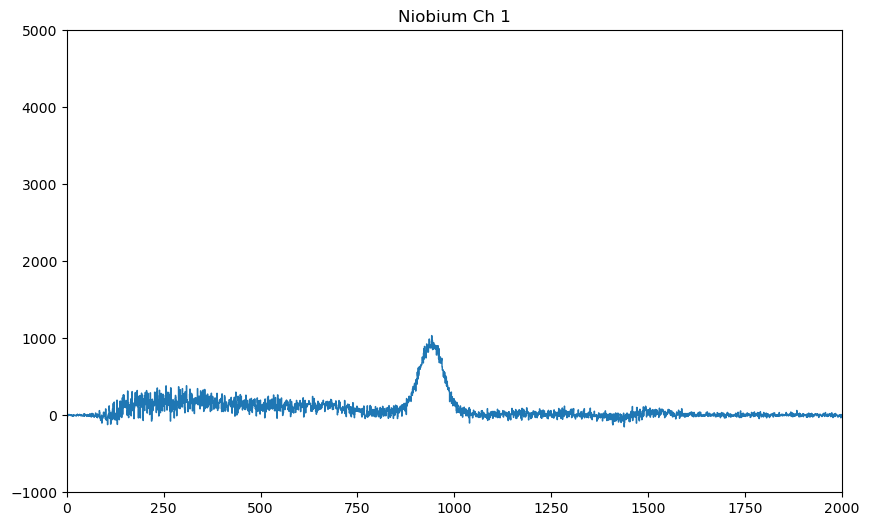

In [13]:
fig, ax = plt.subplots(figsize=[10, 6])
ax.stairs(counts['Niobium'][4]['hist'], counts['Niobium'][4]['calibrated_bin_edges'])
ax.set_xlim(0, 2000)
ax.set_ylim(-1e3, 5e3)
ax.set_title('Niobium Ch 1')


Text(0.5, 1.0, 'Zirconium Ch 1')

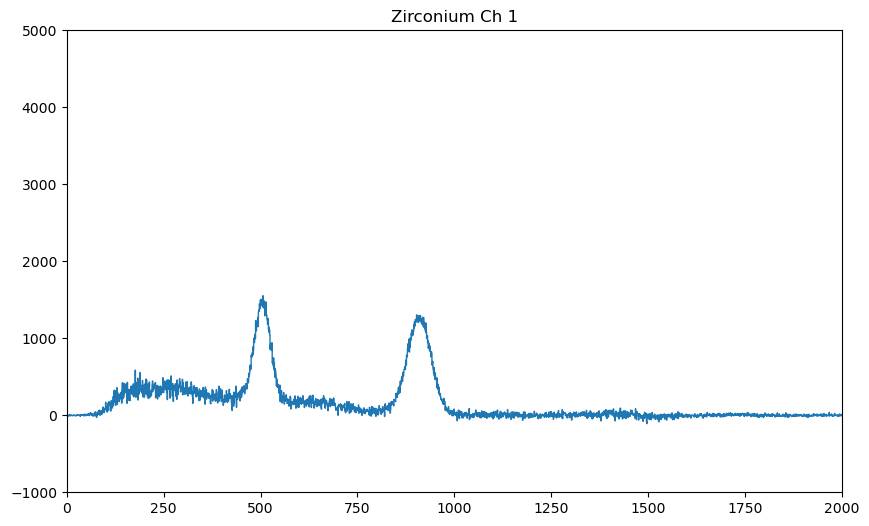

In [14]:
fig, ax = plt.subplots(figsize=[10, 6])
ax.stairs(counts['Zirconium'][4]['hist'], counts['Zirconium'][4]['calibrated_bin_edges'])
ax.set_xlim(0, 2000)
ax.set_ylim(-1e3, 5e3)
ax.set_title('Zirconium Ch 1')

In [15]:
import sys
sys.path.append('../libra-toolbox/')
import libra_toolbox.neutron_detection.activation_foils as lib
print(lib.settings.ureg)

In [16]:
foil = {'nuclide':'Nb93',
        'mass':0.5467 * lib.settings.ureg.g,
        'thickness': 0.01 * 2 * lib.settings.ureg.inch,
        'reactions':{'(n,2n)m':
                        {'branching_ratio': 0.9915,
                        'photon_energy': 934.44,
                        'half_life': 10.15 * lib.settings.ureg.day}}
}

flux = {}

for ch in counts['Niobium'].keys():
        experiment = {
                "foil_name": f"Nb_Ch{ch}",
                "generator": "A325",
                "run": 1,
                "time_generator_off": datetime.datetime(2024, 12, 10, 21, 54, 0, 0, ZoneInfo('America/New_York')),
                "start_time_counting": counts['Niobium'][ch]['start_time'],
                "real_count_time": counts['Niobium'][ch]['real_count_time'] * lib.settings.ureg.second,
                "live_count_time": counts['Niobium'][ch]['live_count_time'] * lib.settings.ureg.second,
                "distance_from_center_of_target_plane": 5.08 * lib.settings.ureg.cm
        }
        irradiations = [
                {"t_on": 0, "t_off": 12 * lib.settings.ureg.h},
                {"t_on": 24 * lib.settings.ureg.h, "t_off": 36 * lib.settings.ureg.h},
        ]
        for reaction in foil['reactions'].keys():
                foil['reactions'][reaction]['decay_constant'] = (np.log(2) / foil['reactions'][reaction]['half_life']).to(1/lib.settings.ureg.second)
                experiment[reaction] = {}
                experiment[reaction]['photon_counts'] = naa.get_peak_areas(counts['Niobium'][ch]['hist'], 
                                                                counts['Niobium'][ch]['calibrated_bin_edges'],
                                                                [foil['reactions'][reaction]['photon_energy']],
                                                                plot=False) * lib.settings.ureg.count
                experiment[reaction]['photon_counts_uncertainty'] = np.sqrt(experiment[reaction]['photon_counts']) * lib.settings.ureg.count

                experiment[reaction]['efficiency'] = np.polyval(eff_coeff[ch], foil['reactions'][reaction]['photon_energy'])
                print(foil['reactions'][reaction]['branching_ratio'])
                flux[ch] = lib.explicit.get_neutron_flux(experiment, irradiations, foil, reaction).to(1/lib.settings.ureg.s)
                print('Ch {} Flux: {:.3e}\n'.format(ch, flux[ch]))
print('Total Flux: {:.3e}'.format(flux[4] + flux[5]))

[(934.44,)]
[np.float64(89044.86851244004)]
0.9915
inside get_neutron_flux()
efficiency 0.017040744630069216 count / particle
number of decays measured [5225409.4786043605] particle
number 3.5435970644424057e+21 particle
cross section 0.4729 barn
att coeff 0.05866 centimeter ** 2 / gram
density 8.582 gram / centimeter ** 3
thickness 0.02 inch
flux:  [3.1182194882457573e-15] / barn
f_time 3922.4005905040776 second
f_self 0.987321438313649 dimensionless
Ch 5 Flux: [2.611e+08] / second

[(934.44,)]
[np.float64(70037.18076633188)]
0.9915
inside get_neutron_flux()
efficiency 0.013362400454863829 count / particle
number of decays measured [5241362.209051203] particle
number 3.5435970644424057e+21 particle
cross section 0.4729 barn
att coeff 0.05866 centimeter ** 2 / gram
density 8.582 gram / centimeter ** 3
thickness 0.02 inch
flux:  [3.1277391469775283e-15] / barn
f_time 3922.511913782107 second
f_self 0.987321438313649 dimensionless
Ch 4 Flux: [2.619e+08] / second

Total Flux: [5.230e+08] 

In [17]:
foil = {'nuclide':'Zr90',
        'mass':0.9036  * lib.settings.ureg.g,
        'thickness': 0.005 * 8 * lib.settings.ureg.inch,
        'reactions':{'(n,2n)':
                        {'branching_ratio': 0.9904,
                        'photon_energy': 909.15,
                        'half_life': 78.41 * lib.settings.ureg.hour}}
}

flux = {}

for ch in counts['Zirconium'].keys():
        experiment = {
                "foil_name": f"Zr_Ch{ch}",
                "generator": "A325",
                "run": 1,
                "time_generator_off": datetime.datetime(2024, 12, 10, 21, 54, 0, 0, ZoneInfo('America/New_York')),
                "start_time_counting": counts['Zirconium'][ch]['start_time'],
                "real_count_time": counts['Zirconium'][ch]['real_count_time'] * lib.settings.ureg.second,
                "live_count_time": counts['Zirconium'][ch]['live_count_time'] * lib.settings.ureg.second,
                "distance_from_center_of_target_plane": 5.08 * lib.settings.ureg.cm
        }
        irradiations = [
                {"t_on": 0, "t_off": 12 * lib.settings.ureg.h},
                {"t_on": 24 * lib.settings.ureg.h, "t_off": 36 * lib.settings.ureg.h},
        ]
        for reaction in foil['reactions'].keys():
                foil['reactions'][reaction]['decay_constant'] = (np.log(2) / foil['reactions'][reaction]['half_life']).to(1/lib.settings.ureg.second)
                experiment[reaction] = {}
                experiment[reaction]['photon_counts'] = naa.get_peak_areas(counts['Zirconium'][ch]['hist'], 
                                                                counts['Zirconium'][ch]['calibrated_bin_edges'],
                                                                [foil['reactions'][reaction]['photon_energy']],
                                                                plot=False) * lib.settings.ureg.count
                experiment[reaction]['photon_counts_uncertainty'] = np.sqrt(experiment[reaction]['photon_counts']) * lib.settings.ureg.count

                experiment[reaction]['efficiency'] = np.polyval(eff_coeff[ch], foil['reactions'][reaction]['photon_energy'])
                print(foil['reactions'][reaction]['branching_ratio'])
                flux[ch] = lib.explicit.get_neutron_flux(experiment, irradiations, foil, reaction).to(1/lib.settings.ureg.s)
                print('Ch {} Flux: {:.3e}\n'.format(ch, flux[ch]))
print('Total Flux: {:.3e}'.format(flux[4] + flux[5]))

[(909.15,)]
[np.float64(115774.10173459272)]
0.9904
inside get_neutron_flux()
efficiency 0.01758240688881459 count / particle
number of decays measured [6584656.0409340095] particle
number 3.069041512354476e+21 particle
cross section 0.5068 barn
att coeff 0.0581 centimeter ** 2 / gram
density 6.505 gram / centimeter ** 3
thickness 0.04 inch
flux:  [4.23344307949896e-15] / barn
f_time 6270.512078096841 second
f_self 0.9810440255969383 dimensionless
Ch 5 Flux: [2.232e+08] / second

[(909.15,)]
[np.float64(93501.81001211407)]
0.9904
inside get_neutron_flux()
efficiency 0.013762057878429178 count / particle
number of decays measured [6794173.577679104] particle
number 3.069041512354476e+21 particle
cross section 0.5068 barn
att coeff 0.0581 centimeter ** 2 / gram
density 6.505 gram / centimeter ** 3
thickness 0.04 inch
flux:  [4.368147240271096e-15] / barn
f_time 6270.505480770139 second
f_self 0.9810440255969383 dimensionless
Ch 4 Flux: [2.303e+08] / second

Total Flux: [4.534e+08] / seco

In [18]:
foil = {'nuclide':'Zr90',
        'mass':0.9036  * lib.settings.ureg.g,
        'thickness': 0.005 * 8 * lib.settings.ureg.inch,
        'reactions':{'(n,2n)':
                        {'branching_ratio': 0.45,
                        'photon_energy': 511.,
                        'half_life': 78.41 * lib.settings.ureg.hour}}
}

flux = {}

for ch in counts['Zirconium'].keys():
        experiment = {
                "foil_name": f"Zr_Ch{ch}",
                "generator": "A325",
                "run": 1,
                "time_generator_off": datetime.datetime(2024, 12, 10, 21, 54, 0, 0, ZoneInfo('America/New_York')),
                "start_time_counting": counts['Zirconium'][ch]['start_time'],
                "real_count_time": counts['Zirconium'][ch]['real_count_time'] * lib.settings.ureg.second,
                "live_count_time": counts['Zirconium'][ch]['live_count_time'] * lib.settings.ureg.second,
                "distance_from_center_of_target_plane": 5.08 * lib.settings.ureg.cm
        }
        irradiations = [
                {"t_on": 0, "t_off": 12 * lib.settings.ureg.h},
                {"t_on": 24 * lib.settings.ureg.h, "t_off": 36 * lib.settings.ureg.h},
        ]
        for reaction in foil['reactions'].keys():
                foil['reactions'][reaction]['decay_constant'] = (np.log(2) / foil['reactions'][reaction]['half_life']).to(1/lib.settings.ureg.second)
                experiment[reaction] = {}
                experiment[reaction]['photon_counts'] = naa.get_peak_areas(counts['Zirconium'][ch]['hist'], 
                                                                counts['Zirconium'][ch]['calibrated_bin_edges'],
                                                                [foil['reactions'][reaction]['photon_energy']],
                                                                plot=False) * lib.settings.ureg.count
                experiment[reaction]['photon_counts_uncertainty'] = np.sqrt(experiment[reaction]['photon_counts']) * lib.settings.ureg.count

                experiment[reaction]['efficiency'] = np.polyval(eff_coeff[ch], foil['reactions'][reaction]['photon_energy'])
                print(foil['reactions'][reaction]['branching_ratio'])
                flux[ch] = lib.explicit.get_neutron_flux(experiment, irradiations, foil, reaction).to(1/lib.settings.ureg.s)
                print('Ch {} Flux: {:.3e}\n'.format(ch, flux[ch]))
print('Total Flux: {:.3e}'.format(flux[4] + flux[5]))

[(511.0,)]
[np.float64(81329.21177551702)]
0.45
inside get_neutron_flux()
efficiency 0.01401696800960176 count / particle
number of decays measured [5802197.145617063] particle
number 3.069041512354476e+21 particle
cross section 0.5068 barn
att coeff 0.0581 centimeter ** 2 / gram
density 6.505 gram / centimeter ** 3
thickness 0.04 inch
flux:  [3.730380326519981e-15] / barn
f_time 6270.512078096841 second
f_self 0.9810440255969383 dimensionless
Ch 5 Flux: [1.967e+08] / second

[(511.0,)]
[np.float64(64565.54207976367)]
0.45
inside get_neutron_flux()
efficiency 0.010267966337955323 count / particle
number of decays measured [6288055.4877842255] particle
number 3.069041512354476e+21 particle
cross section 0.5068 barn
att coeff 0.0581 centimeter ** 2 / gram
density 6.505 gram / centimeter ** 3
thickness 0.04 inch
flux:  [4.042751029481203e-15] / barn
f_time 6270.505480770139 second
f_self 0.9810440255969383 dimensionless
Ch 4 Flux: [2.131e+08] / second

Total Flux: [4.098e+08] / second
